# IMPORTING LIBRARIES

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET

In [6]:
df = pd.read_csv("vgsales.csv",delimiter=",",index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [7]:
dataset = df.copy()

# ABOUT THE DATASET

This dataset contains a list of video games with sales greater than 100,000 copies. 

In [8]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

about features:

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sale

In [9]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (16598, 10)


In [10]:
print("number of elements: ",df.size)

number of elements:  165980


In [11]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


- The mean global sales for a video game is approximately 0.54 million units.
- The mean NA sales are 0.26 million units
- The mean EU sales are 0.15 million units
- The mean JP sales are 0.08 million units
- The mean other region sales are 0.05 million units

In [13]:
# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [14]:
df.dtypes

Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [15]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# MISSING VALUES AND DUPLICATES

In [16]:
df.info() # to know the no:of non nulls.null,datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          16598 non-null  object        
 1   Platform      16598 non-null  object        
 2   Year          16327 non-null  datetime64[ns]
 3   Genre         16598 non-null  object        
 4   Publisher     16540 non-null  object        
 5   NA_Sales      16598 non-null  float64       
 6   EU_Sales      16598 non-null  float64       
 7   JP_Sales      16598 non-null  float64       
 8   Other_Sales   16598 non-null  float64       
 9   Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


In [17]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

- there is missing values in the columns `Year (271)` and `Publisher (58)`

In [18]:
df.duplicated().any()

True

- false means there doesn't exist any duplicate values

# EXPLORATORY DATA ANALYSIS

In [19]:
print("    VIDEO GAMES SALES DATA     ".title())
print("--------------------------------")
print("The number of total games released : ",df["Name"].nunique())
print("The number of different years of publication: ",df["Year"].nunique())
print("The number of different types of genres: ",df["Genre"].nunique())
print("The number of differnet type of publishers: ",df["Publisher"].nunique())
print("The number of different types of platforms: ",df["Platform"].nunique())

    Video Games Sales Data     
--------------------------------
The number of total games released :  11493
The number of different years of publication:  39
The number of different types of genres:  12
The number of differnet type of publishers:  578
The number of different types of platforms:  31


# Sales Trends Over Time

In [20]:
df.Year.value_counts()


2009-01-01    1431
2008-01-01    1428
2010-01-01    1259
2007-01-01    1202
2011-01-01    1139
2006-01-01    1008
2005-01-01     941
2002-01-01     829
2003-01-01     775
2004-01-01     763
2012-01-01     657
2015-01-01     614
2014-01-01     582
2013-01-01     546
2001-01-01     482
1998-01-01     379
2000-01-01     349
2016-01-01     344
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      60
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1989-01-01      17
1983-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1985-01-01      14
1984-01-01      14
1980-01-01       9
2017-01-01       3
2020-01-01       1
Name: Year, dtype: int64

In [21]:
# Group by year and sum global sales
sales_over_time = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()

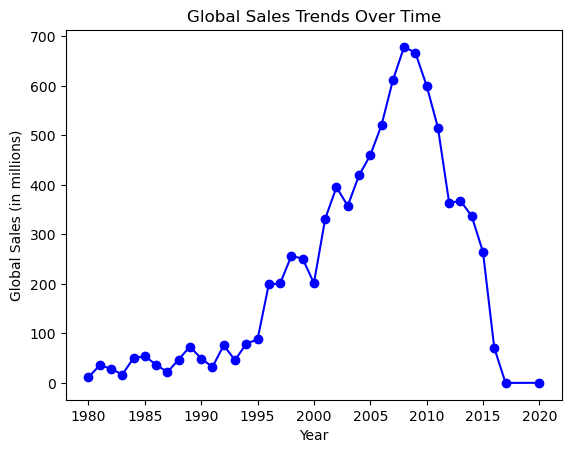

In [22]:
# Plotting sales trends over time

sales_over_time.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

- after 2000 a hike occur in the release of games
- 2009 is the year where number of games  released more
- 2010 a sudden decrease occur in the release of games
- 2020 was the years with least number of releases the reason can be covid where employees had to work from home

## Top-selling Games

In [24]:
# Top-selling games
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
top_games

,Name,Global_Sales
Rank,,
1,Wii Sports,82.74
2,Super Mario Bros.,40.24
3,Mario Kart Wii,35.82
4,Wii Sports Resort,33.00
5,Pokemon Red/Pokemon Blue,31.37
6,Tetris,30.26
7,New Super Mario Bros.,30.01
8,Wii Play,29.02
9,New Super Mario Bros. Wii,28.62


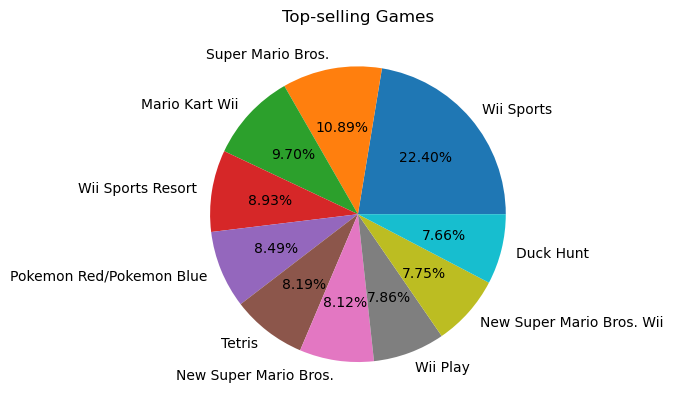

In [25]:
plt.pie(top_games["Global_Sales"],labels = top_games["Name"],autopct = "%.2f%%")
# %.2f formats the percentage value with two decimal places.
plt.title("Top-selling Games")
plt.show()


- `Wii Sports` is the most saled game

## Top-selling platforms

In [26]:
# Top-selling platforms
top_platforms=df[['Platform', 'Global_Sales']]

In [27]:
# Top-selling platforms
top_platforms=df[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)

In [28]:
top_platforms.reset_index()

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49
5,PS,730.66
6,GBA,318.50
7,PSP,296.28
8,PS4,278.10
9,PC,258.82


In [29]:
platforms = {} # creates an empty dictionary named platforms to store the counts of each platform.

for index, row in df.iterrows(): # loop iterates through each row of the df
    platform_list = row['Platform'].split(', ') # splits the content of the 'Platform(s)' column into a list of platforms
    for platform in platform_list: # This inner loop iterates through each platform in the platform_list
        if platform in platforms: #  checks if the platform is already a key in the platforms dictionary.
            platforms[platform] += 1 # increments the count of that platform
        else:
            platforms[platform] = 1 #  initializes the count for that platform to 1.


In [30]:
platforms_df = pd.DataFrame([platforms]).T.reset_index()
platforms_df.columns =['Platform', 'Global_Sales']
platforms_df

,Platform,Global_Sales
0,Wii,1325
1,NES,98
2,GB,98
3,DS,2163
4,X360,1265
5,PS3,1329
6,PS2,2161
7,SNES,239
8,GBA,822
9,3DS,509


In [31]:
platforms_dff = platforms_df.sort_values(by='Global_Sales', ascending=False).head(10)

In [32]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

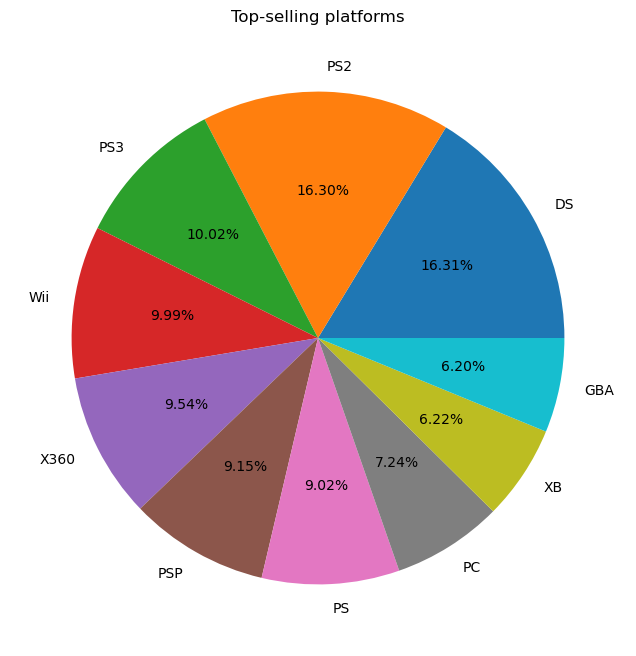

In [33]:
plt.figure(figsize = (12,8))
plt.pie(platforms_dff["Global_Sales"],labels = platforms_dff["Platform"],autopct = "%.2f%%")
plt.title("Top-selling platforms")
plt.show()

 - In Platform `DS` and `PS2`,the games saled most

## Genre Analysis

In [34]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [35]:
genres = {}

for index, row in df.iterrows():
    genres_list = row['Genre'].split(', ')
    for genre in genres_list:
        if genre in genres:
            genres[genre] += 1
        else:
            genres[genre] = 1

In [36]:
genre_df = pd.DataFrame(genres,index=[0]).T.reset_index()
genre_df.columns = ["Genre","Global_Sales"]
genre_df = genre_df.sort_values(by="Global_Sales",ascending=False)

In [37]:
genre_df

,Genre,Global_Sales
8,Action,3316
0,Sports,2346
5,Misc,1739
3,Role-Playing,1488
6,Shooter,1310
10,Adventure,1286
2,Racing,1249
1,Platform,886
7,Simulation,867
9,Fighting,848


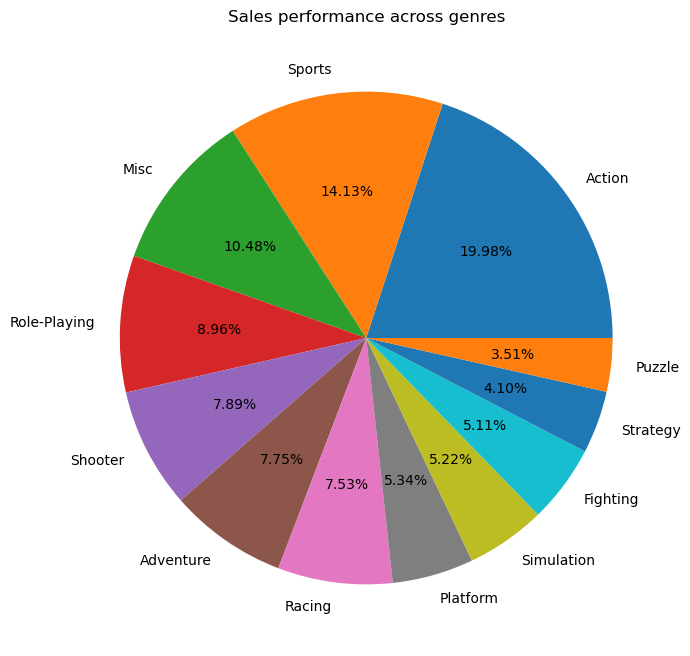

In [38]:
plt.figure(figsize = (12,8))
plt.pie(genre_df["Global_Sales"],labels = genre_df["Genre"],autopct = "%.2f%%")
plt.title("Sales performance across genres")
plt.show()

- Genre `Action` is most saled

## Regional Analysis

In [39]:
# Examining sales data based on regions
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

- games more saled in the North American region 

## Market share of major game publishers

In [40]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [41]:
publisher_df = df["Publisher"].value_counts().sort_values(ascending=False).reset_index().head(10)
publisher_df.columns = ["Publisher","Global_Sales"]

In [42]:
publisher_df

,Publisher,Global_Sales
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


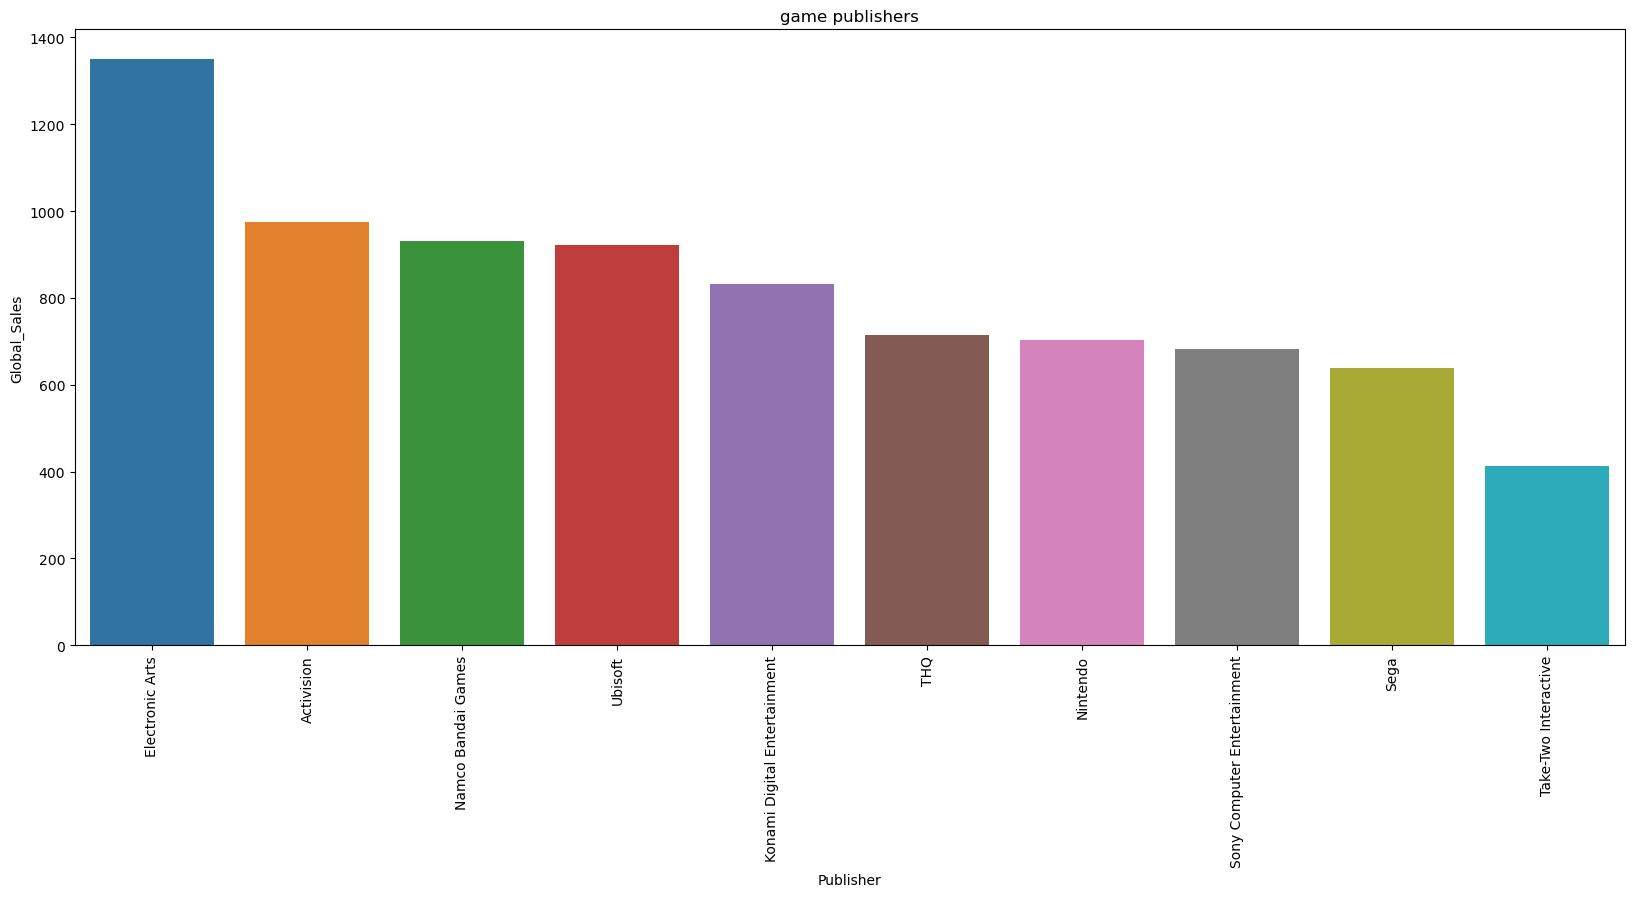

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(data=publisher_df, x='Publisher', y='Global_Sales')
plt.xticks(rotation=90)
plt.title("game publishers")
plt.show()

- Publisher `Electronic Arts` saled more games

## Correlation Analysis

In [44]:
df.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


<Axes: >

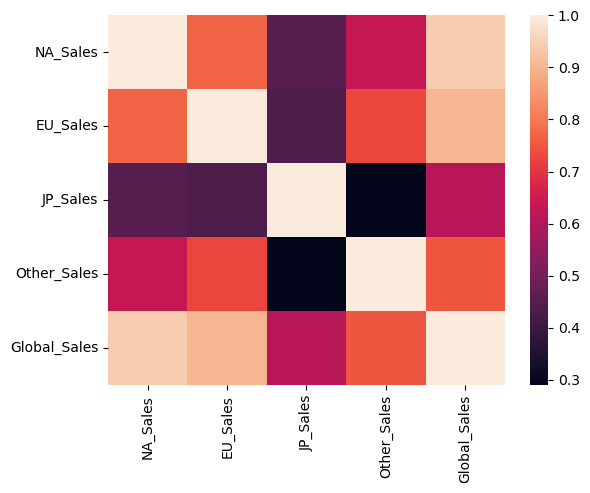

In [45]:
sns.heatmap(df.corr())

- NA and EU sales have the strongest positive correlation with global sales,that is games performed well in NA and EU helps to increase global sale
- JP sales show a moderate positive correlation with global sales
- Other sales exhibit a strong positive correlation with both NA and EU sales

# CONCLUSIONS:

- The number of total games released :  11493
- after 2000 a hike occur in the release of games
- 2009 is the year where number of games released more
- 2010 a sudden decrease occur in the release of games
- 2020 was the years with least number of releases the reason can be covid where employees had to work from home
- `Wii Sports` is the most saled game
- In Platform `DS` and `PS2`,the games saled most
- Genre `Action` is most saled
- games more saled in the North American region 
- Publisher `Electronic Arts` saled more games
- NA and EU sales have the strongest positive correlation with global sales,that is games performed well in NA and EU helps to increase global sale
- JP sales show a moderate positive correlation with global sales
- Other sales exhibit a strong positive correlation with both NA and EU sales